In [176]:
# Preferible ejecutarlo en la computadora
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Link para descargar el dataset de Perros y gatos:

https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

In [83]:
img_array = cv2.imread('/content/drive/MyDrive/Colab/DL/dog_example.jpeg', cv2.IMREAD_GRAYSCALE)
print(img_array.shape)

AttributeError: ignored

TypeError: ignored

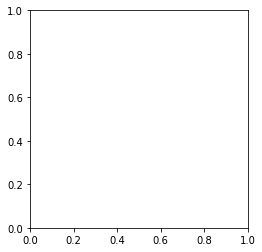

In [84]:
plt.imshow(img_array, cmap='gray')  # graph it
plt.show()  # display!

In [233]:
DATADIR = '/content/drive/MyDrive/3D Images'

CATEGORIES = "Autos","Botellas de cerveza","Libreros","Martillos","Tachos","Latas_gaseosa","Tijeras","Mesas","Cajones de oficina","Tazas"

path = os.path.join(DATADIR,CATEGORIES[0])
print(path)
print(os.listdir(path))

/content/drive/MyDrive/3D Images/Autos
['n02814533_32924.JPEG', 'n02814533_39818.JPEG', 'n02958343_5061.JPEG', 'n02814533_2880.JPEG', 'n02814533_126.JPEG', 'n02958343_13798.JPEG', 'n02958343_14760.JPEG', 'n02814533_13662.JPEG', 'n02814533_33781.JPEG', 'n02958343_520.JPEG', 'n02814533_4092.JPEG', 'n02958343_9081.JPEG', 'n02958343_8064.JPEG', 'n02814533_42242.JPEG', 'n02814533_12532.JPEG', 'n02814533_13427.JPEG', 'n02958343_10663.JPEG', 'n03498781_2927.JPEG', 'n02814533_5947.JPEG', 'n02958343_1211.JPEG', 'n03498781_8871.JPEG', 'n02814533_45804.JPEG', 'n03498781_1479.JPEG', 'n02958343_971.JPEG', 'n03498781_5872.JPEG', 'n03498781_1650.JPEG', 'n02958343_12.JPEG', 'n03498781_6611.JPEG', 'n03498781_5005.JPEG', 'n02814533_45607.JPEG', 'n02814533_5242.JPEG', 'n03498781_3943.JPEG', 'n02958343_12923.JPEG', 'n03498781_101.JPEG', 'n02958343_12116.JPEG', 'n03498781_4702.JPEG', 'n03498781_12328.JPEG', 'n02814533_517.JPEG', 'n02958343_11117.JPEG', 'n02814533_11760.JPEG', 'n02814533_39047.JPEG', 'n0281

/content/drive/MyDrive/3D Images/Autos/n02814533_35.JPEG


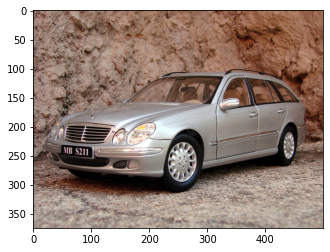

In [234]:
img = 'n02814533_35.JPEG'
img_path = os.path.join(path,img)
print(img_path)

img_array = cv2.imread(os.path.join(path,img))[...,::-1]
plt.imshow(img_array, cmap='gray')  # graph it
plt.show()  # display!"""

In [235]:
IMG_SIZE = 100

/content/drive/MyDrive/3D Images/Autos


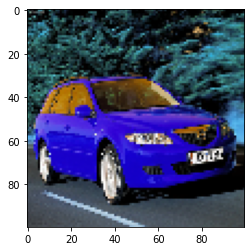

In [236]:
###CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
  path = os.path.join(DATADIR,category)  # create path to dogs and cats
  for img in os.listdir(path):
    print(path)
    img_array = cv2.imread(os.path.join(path,img) )  # convert to array
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array, cmap='gray')  # graph it
    plt.show()  # display!"""

    break # Enough
  break

In [237]:
training_data = []
def create_training_data():
  x=0
  for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

    for img in tqdm(os.listdir(path)):
         # iterate over each image per dogs and cats
       try:
         img_array = cv2.imread(os.path.join(path,img))  # convert to array
         new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
         training_data.append([new_array, class_num])
         x+=1
          # add this to our training_data
       except Exception as e:  # in the interest in keeping the output clean...
         pass
      #except OSError as e:
      #    print("OSErrroBad img most likely", e, os.path.join(path,img))
      #except Exception as e:
    print(len(training_data))
      #    print("general exception", e, os.path.join(path,img))
  print(x)

create_training_data()

print(len(training_data))

100%|██████████| 1978/1978 [00:18<00:00, 108.05it/s]


1978


100%|██████████| 396/396 [00:03<00:00, 100.73it/s]


2374


100%|██████████| 760/760 [00:07<00:00, 97.24it/s]


3134


100%|██████████| 711/711 [00:06<00:00, 118.04it/s]


3845


100%|██████████| 757/757 [00:07<00:00, 104.15it/s]


4602


100%|██████████| 524/524 [00:04<00:00, 107.35it/s]


5126


100%|██████████| 841/841 [00:06<00:00, 122.49it/s]


5967


100%|██████████| 424/424 [00:04<00:00, 90.96it/s]


6391


100%|██████████| 701/701 [00:06<00:00, 113.64it/s]


7092


100%|██████████| 1123/1123 [00:11<00:00, 101.91it/s]

8215
8215
8215


In [238]:
import random

random.shuffle(training_data)

In [239]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
print(len(X))

8215


In [240]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()
print(len(X))
pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
print(len(y))

8215
8215


In [241]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
print(len(X))
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

8215


In [242]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [243]:
import pickle

pickle_in = open('/content/X.pickle',"rb")
X = pickle.load(pickle_in)

pickle_in = open('/content/y.pickle',"rb")
y = pickle.load(pickle_in)

In [244]:
print("X type of variable:"+str(type(X)))
print("y type of variable:"+str(type(y)))

X type of variable:<class 'list'>
y type of variable:<class 'list'>


In [245]:
import numpy as np

y = np.array(y)
print("y New type of variable:"+str(type(y)))

X=np.array(X)

y New type of variable:<class 'numpy.ndarray'>


In [248]:
X = X/255.0
print(X.shape)
print()

(8215, 100, 100, 3)



In [249]:
model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(128))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=5, validation_split=0.3)



Epoch 1/5
180/180 [==============================] - 360s 2s/step - loss: -20729268.0000 - accuracy: 0.0468 - val_loss: -124907256.0000 - val_accuracy: 0.0519
Epoch 2/5
154/180 [========================>.....] - ETA: 45s - loss: -831701760.0000 - accuracy: 0.0459

KeyboardInterrupt: ignored